In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
daily_transactions = pd.read_csv("Daily Household Transactions.csv")
df = daily_transactions

In [3]:
## Checking the loaded data only 5 records
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [4]:
## Checking the column types
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


(2461, 8)

In [5]:
## Check for missing values
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [6]:
## Changing format of date column from object to date and bring consistency in date
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True).dt.date
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [7]:
#Dropping duplicate values in the dataset
df.drop_duplicates(inplace=True)

In [8]:
# Finding out the frequency of the mode of transactions
df["Mode"].value_counts()

Mode
Saving Bank account 1    1215
Cash                     1043
Credit Card               162
Equity Mutual Fund B       11
Share Market Trading        5
Saving Bank account 2       5
Recurring Deposit           3
Debit Card                  2
Equity Mutual Fund C        1
Equity Mutual Fund A        1
Equity Mutual Fund D        1
Fixed Deposit               1
Name: count, dtype: int64

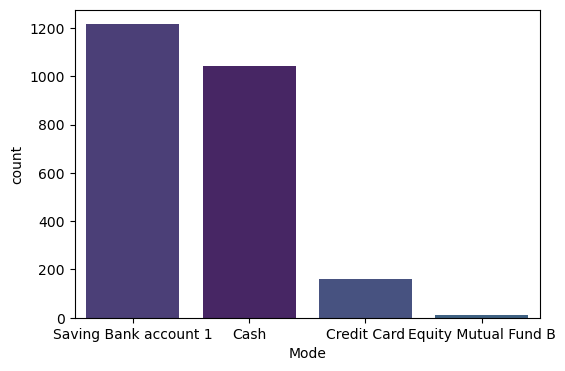

In [9]:
# Plotting the frequency of unique values on bar plot

plt.figure(figsize = (6,4))
sns.countplot(data = df, x = "Mode", hue="Mode", order = df["Mode"].value_counts().iloc[:4].index, palette="viridis")
plt.show()
              
           

In [10]:
## Category wise frequency 
df["Category"].value_counts()

Category
Food                         905
Transportation               306
Household                    176
subscription                 143
Other                        126
Investment                   101
Health                        94
Family                        71
Apparel                       47
Money transfer                43
Salary                        43
Recurring Deposit             41
Gift                          30
Public Provident Fund         29
Equity Mutual Fund E          22
Beauty                        22
Gpay Reward                   21
Education                     18
maid                          17
Saving Bank account 1         17
Festivals                     16
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Interest                      12
Dividend earned on Shares     12
Culture                       11
Small cap fund 1              10
Small Cap fund 2              10
Share Market                   8
Maturity amount                7
L

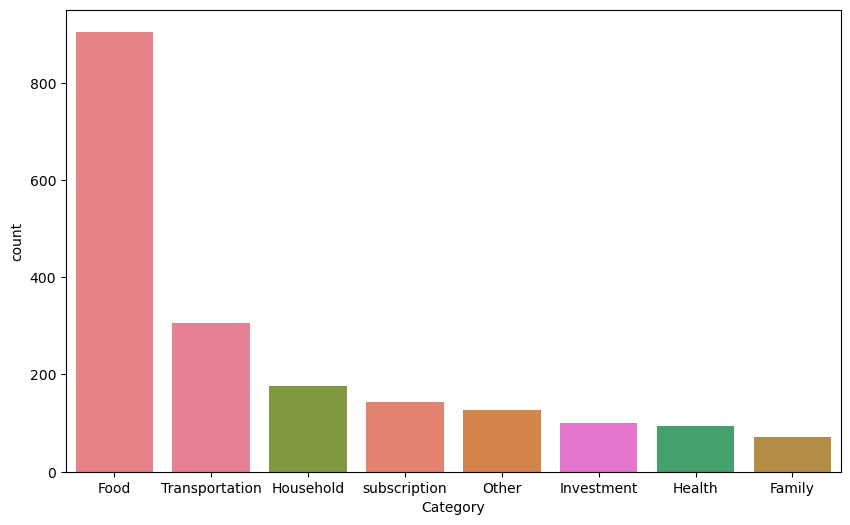

In [11]:
## Plotting frequency of category column on bar plot.

plt.figure(figsize = (10,6))
sns.countplot(data = df, x = "Category", hue="Category", order = df["Category"].value_counts().iloc[:8].index)
plt.show()

In [12]:
## Plotting the highest frequency of value from subcategory

df["Subcategory"].unique()

array(['Train', 'snacks', 'Netflix', 'Mobile Service Provider',
       'Ganesh Pujan', 'Tata Sky', 'auto', nan, 'Grocery', 'Lunch',
       'Milk', 'Pocket money', 'Laundry', 'breakfast', 'Dinner', 'Sweets',
       'Kirana', 'Ice cream', 'curd', 'Biscuits', 'Rajgira ladu',
       'Navratri', 'train', 'Tea', 'flour mill', 'Appliances',
       'home decor', 'grooming', 'Health', 'Clothing', 'clothes', 'Home',
       'chocolate', 'Medicine', 'Eating out', 'Movie', 'vegetables',
       'fruits', 'Potato', 'Onions', 'Taxi', 'Hardware', 'Eggs', 'Bread',
       'Petrol', 'Hospital', 'Mahanagar Gas', 'Lab Tests', 'Bus',
       'Travels', 'Kitchen', 'Footwear', 'Entry Fees', 'gadgets',
       'Accessories', 'misc', 'Stationary', 'Newspaper', 'Toiletries',
       'Bike', 'beverage', 'makeup', 'Books', 'Holi', 'Courier',
       'Leisure', 'Updation', 'Amazon Prime', 'Edtech Course', 'Hotstar',
       'Diwali', 'Wifi Internet Service', 'Trip', 'Furniture', 'Water',
       'Cable TV', 'medicine', 'M

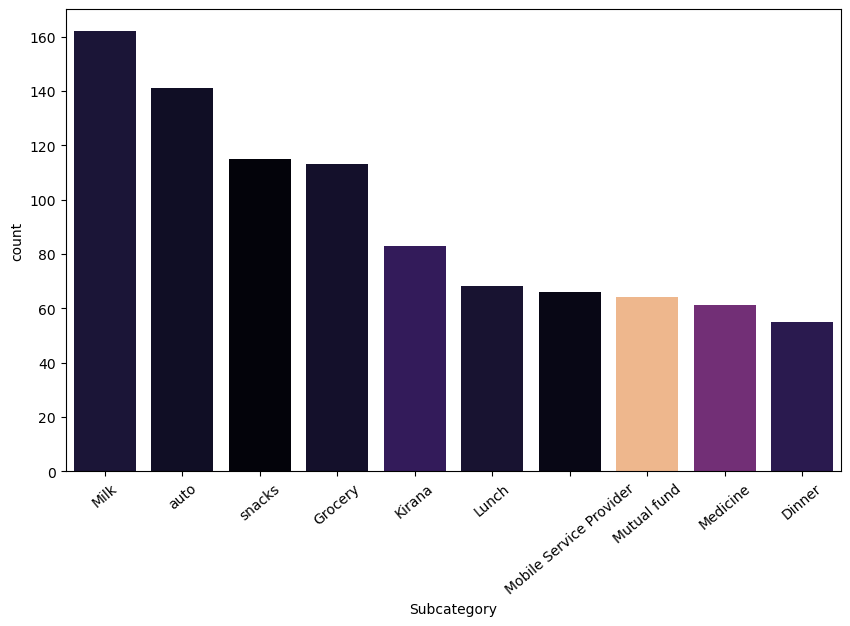

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = "Subcategory", hue="Subcategory", legend=False, order = df["Subcategory"].value_counts().iloc[:10].index, palette="magma")
plt.xticks(rotation =40 )
plt.show()

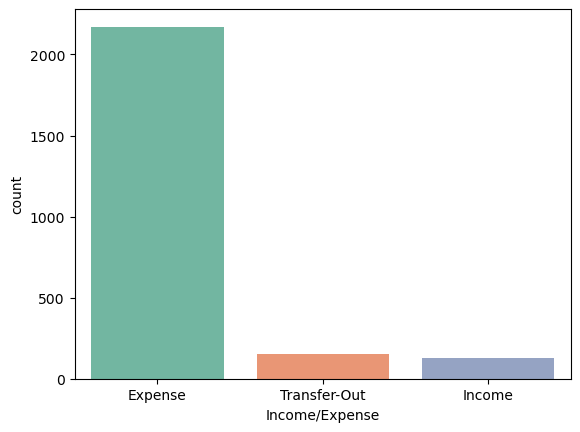

In [14]:
# Plotting the count of transactions having income or expense

sns.countplot(data = df, x = "Income/Expense" , hue="Income/Expense", legend=False, palette="Set2");

In [15]:
#Finding unique values in note column

df["Note"].nunique()

1057

In [16]:
# Count of currency values
df["Currency"].value_counts()

Currency
INR    2450
Name: count, dtype: int64

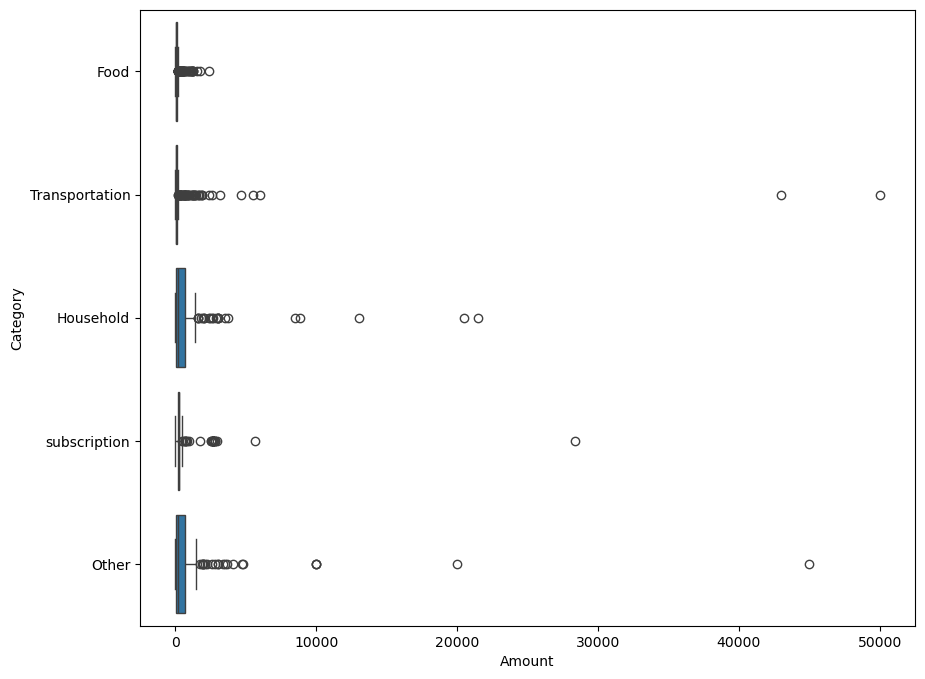

In [17]:
# Finding out the variability in the "Amount" within each category.
# Which categories have higher median transaction amounts.
# Finding out the outliers in each of Five top categories.

plt.figure(figsize = (10,8))
sns.boxplot(data = df, x = "Amount", y = "Category", order = df["Category"].value_counts().iloc[:5].index)
plt.show()

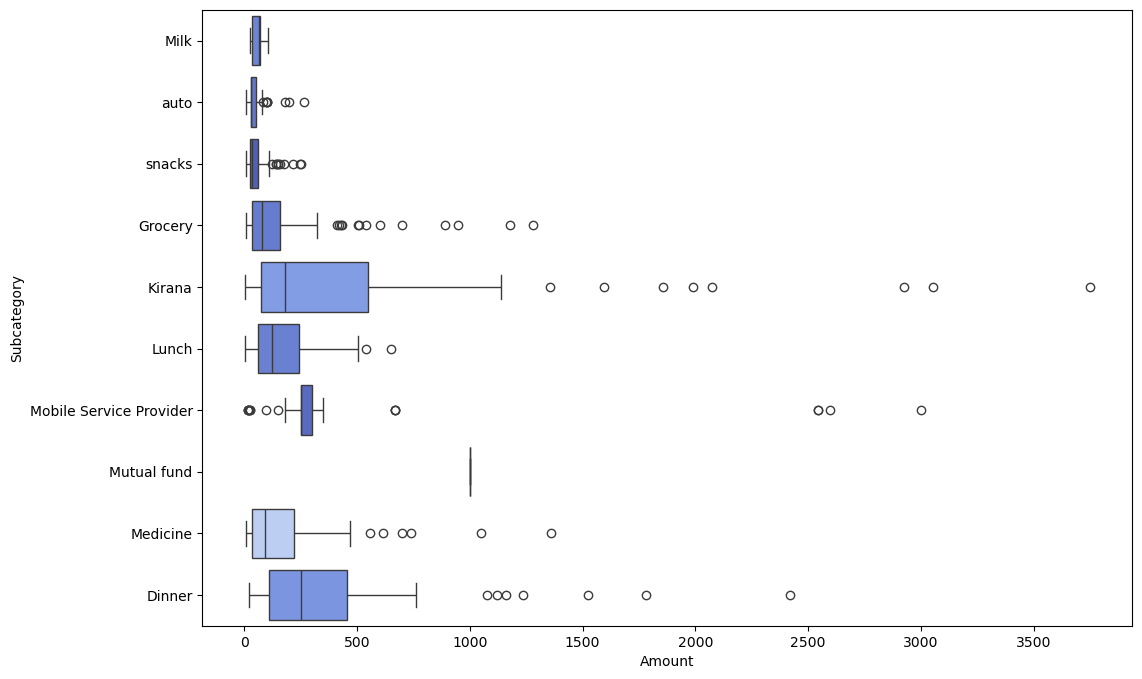

In [18]:
# Finding out the variability in the "Amount" within each category.
# Which categories have higher median transaction amounts.
# Finding out the outliers in each of five Ten categories. 
#What This Box Plot Represents:

#Each box corresponds to a "Subcategory" (only the top 10 by count).

#The x-axis ("Amount") shows the distribution of transaction amounts.

#Each box provides key statistical insights:

#The median (central line in the box): Represents the middle transaction amount for that subcategory.

#The Interquartile Range (IQR): The range between the 25th percentile (Q1) and the 75th percentile (Q3), indicating where most values fall.

#Whiskers: Extend up to 1.5 times the IQR from Q1 and Q3, covering most data points.

#Outliers (dots outside whiskers): Extreme transaction amounts that are significantly different from the rest.

#Insights You Can Get from This Plot
#Which subcategories have higher transaction amounts on average?

#Which subcategories have the most variability in transaction amounts?

#Are there many extreme values (outliers) in some subcategories?

#Are there subcategories where transactions tend to be more consistent? (Smaller boxes indicate less variation)

plt.figure(figsize = (12,8)) 
sns.boxplot(data = df, x = "Amount", y = "Subcategory", hue = "Subcategory", legend=False, order = df["Subcategory"].value_counts().iloc[:10].index, palette="coolwarm")
plt.show()

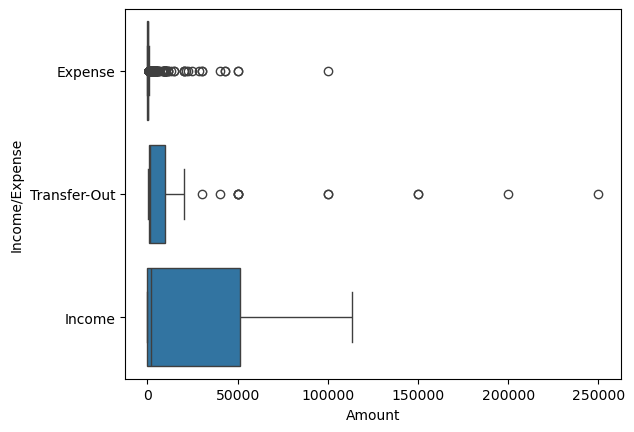

In [19]:
sns.boxplot(data = df, x = "Amount", y = "Income/Expense");

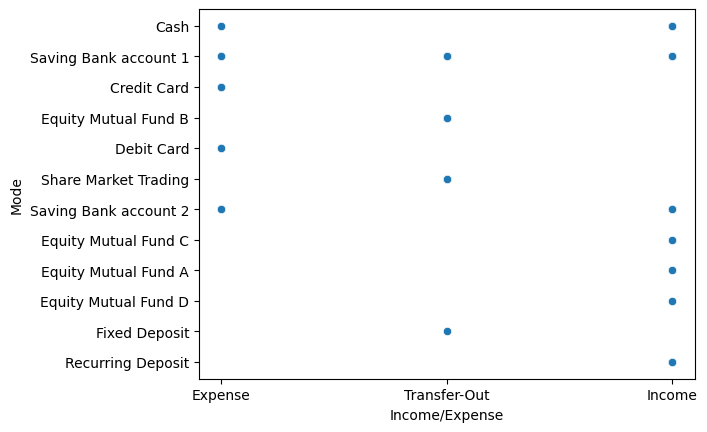

In [20]:
sns.scatterplot(data = df, x = "Income/Expense", y = "Mode");

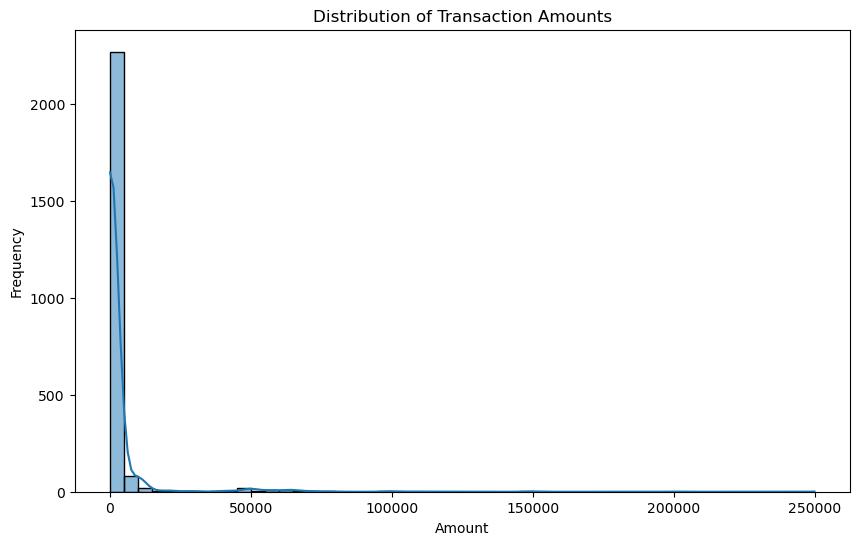

In [21]:
# Distribution of transaction amounts

plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [22]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,2015-01-01,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,2015-01-01,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,2015-01-01,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,2015-01-01,Cash,Food,NaN,tea,10.0,Expense,INR


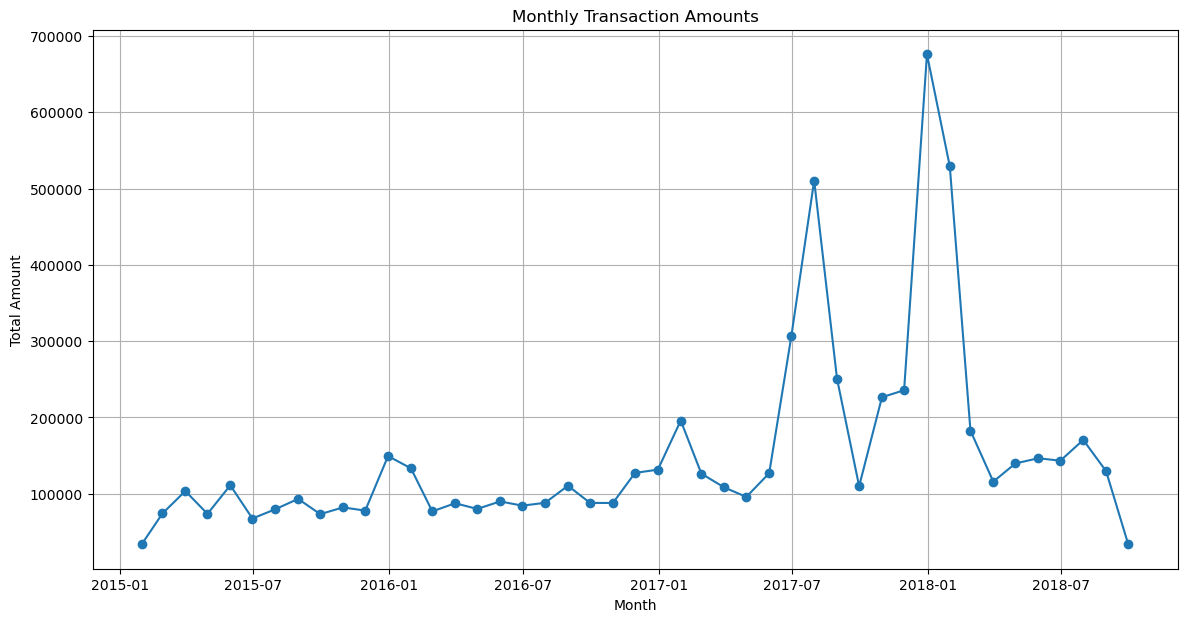

In [28]:
# Resample data to monthly frequency

monthly_data = df.resample('ME').sum()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')

plt.grid(True)
plt.show()


In [ ]:
# Daily trends

daily_data = df.groupby(df.index.date).sum()

plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transactions Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [ ]:
top_categories = df.groupby("Category")['Amount'].sum().nlargest(15).index

In [ ]:
pivot_table = df[df['Category'].isin(top_categories)].pivot_table(index='Date', columns='Category', values='Amount', aggfunc='sum', fill_value=0)

In [ ]:
correlation_matrix = pivot_table.corr()

plt.figure(figsize=(15, 10))

# Mask the upper triangle to reduce redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with the mask applied
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
            linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 8})

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap of Top 15 Categories", fontsize=14)

plt.show()